Import the dataset

In [4]:
import pandas as pd
import numpy as np

boston = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston", sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]
features = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

print(data.shape)
print(target.shape)

(506, 13)
(506,)


Data preparation

In [5]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


Scikit Linear Regression

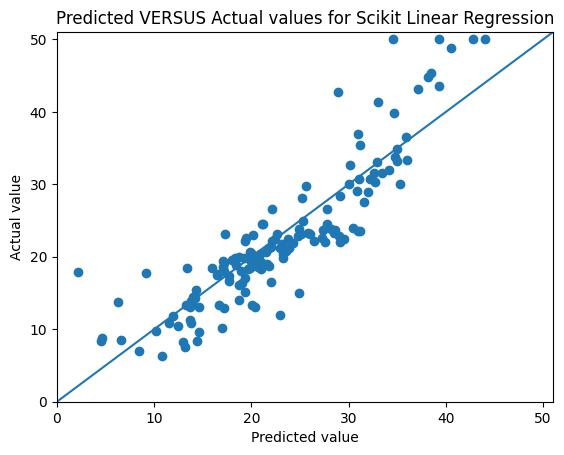

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train, y_train)
preds = lr.predict(x_test)

import matplotlib.pyplot as plt
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted VERSUS Actual values for Scikit Linear Regression")
plt.xlim([0,51])
plt.ylim([0,51])
plt.scatter(preds, y_test)
plt.plot([0,51],[0,51])